### 7.1 캐니 엣지 검출

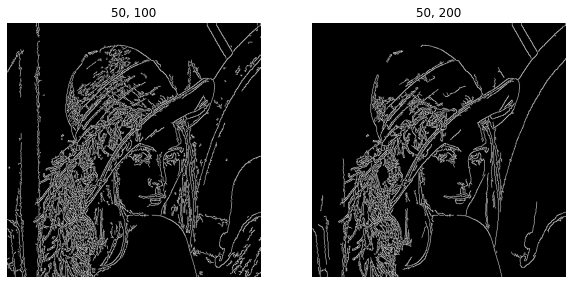

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

edge1 = cv2.Canny(src, 50, 100)
edge2 = cv2.Canny(src, 50, 200)

fig, ax = plt.subplots(1, 2, figsize = (10, 10)) # 2 x 2 서브플롯을 (10, 10)의 크기로 생성
fig.canvas.manager.set_window_title('plt') # 창 이름

ax[0].axis('off')
ax[0].set_title('50, 100')
ax[0].imshow(edge1, cmap='gray')

ax[1].axis('off')
ax[1].set_title('50, 200')
ax[1].imshow(edge2, cmap='gray')
plt.show()

### 7.2 허프 변환, HoughLines

(4, 1, 2)


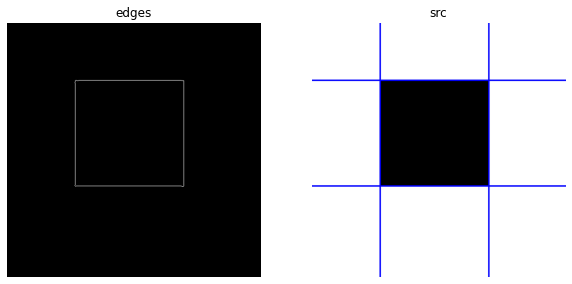

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/rect.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50 ,100)

# 허프 변환을 통해 선 검출
# rho = 1, 작을 수록 정교해짐 (0~1)
# theta = np.pi/180.0, 각도의 간격 pi/180은 간격이 1도씩이다. (np.pi/0~180)
# threshold = 100, 100보다 큰 값들을 edge로 한다. (작은 값: 정확도 감소, 검출 개수 증가 / 큰 값: 정확도 증가, 검출 개수 감소)
lines = cv2.HoughLines(edges, 1, np.pi/180.0, 100)
print(lines.shape)

for line in lines:
    rho, theta = line[0]
    # cos, sin
    c = np.cos(theta)
    s = np.sin(theta)
    
    # x, y 기준(절편) 좌표
    x0 = c * rho
    y0 = s * rho
    
    # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    x1 = int(x0 + 1000 * (-s))
    y1 = int(y0 + 1000 * (c))
    x2 = int(x0 - 1000 * (-s))
    y2 = int(y0 - 1000 * (c))
    
    # 원본에 선 그림
    cv2.line(src, (x1, y1), (x2, y2), (0, 0, 255), 2)

fig, ax = plt.subplots(1, 2, figsize = (10, 10)) # 2 x 2 서브플롯을 (10, 10)의 크기로 생성
fig.canvas.manager.set_window_title('plt') # 창 이름

ax[0].axis('off')
ax[0].set_title('edges')
ax[0].imshow(edges, cmap='gray')

ax[1].axis('off')
ax[1].set_title('src')
ax[1].imshow(src)

# cv2.imshow('edges', edges)
# cv2.imshow('src', src)
# cv2.waitKey()
# cv2.destroyAllWindows()

### 7.3 선분 검출 HoughLinesP

* 허프 선 검출은 모든 점에 대해 수많은 선을 그어서 직선을 찾기 때문에 연산량이 무척 많습니다. 이를 개선하기 위한 방법이 확률적 허프 선 변환입니다

(4, 1, 4)


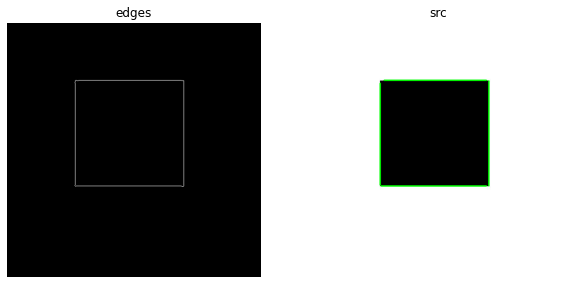

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/rect.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 100)


lines = cv2.HoughLinesP(edges, 1, np.pi/180.0, 100)
print(lines.shape)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(src, (x1, y1), (x2, y2), (0, 255, 0), 2)

fig, ax = plt.subplots(1, 2, figsize = (10, 10)) # 2 x 2 서브플롯을 (10, 10)의 크기로 생성
fig.canvas.manager.set_window_title('plt') # 창 이름

ax[0].axis('off')
ax[0].set_title('edges')
ax[0].imshow(edges, cmap='gray')

ax[1].axis('off')
ax[1].set_title('src')
ax[1].imshow(src)

# cv2.imshow('edges', edges)
# cv2.imshow('src', src)
# cv2.waitKey()
# cv2.destroyAllWindows()


### 7.4 원 검출 HoughCircles

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 1
src1 = cv2.imread('c:/data/circles.jpg')
gray1 = cv2.cvtColor(src1, cv2.COLOR_BGR2GRAY)

# img: 입력 이미지, 1채널 배열
# method: 검출 방식 선택 (현재 cv2.HOUGH_GRADIENT만 가능)
# dp: 입력 영상과 경사 누적의 해상도 반비례율, 1: 입력과 동일, 값이 커질수록 부정확
# minDist: 원들 중심 간의 최소 거리 (0: 에러, 0이면 동심원이 검출 불가하므로)
# circles(optional): 검출 원 결과, N x 1 x 3 부동 소수점 배열 (x, y, 반지름)
# param1(optional): 캐니 엣지에 전달할 스레시홀드 최대 값 (최소 값은 최대 값의 2배 작은 값을 전달)
# param2(optional): 경사도 누적 경계 값 (값이 작을수록 잘못된 원 검출)
# minRadius, maxRadius(optional): 원의 최소 반지름, 최대 반지름 (0이면 이미지 전체의 크기)
circles1 = cv2.HoughCircles(gray1, cv2.HOUGH_GRADIENT, 1, 50, param2=15)

circles1 = np.int32(circles1)
print(circles1.shape)
for circle in circles1[0,:]:
    # cx, cy 중심좌표
    # r 반지름
    cx, cy, r = circle
    cv2.circle(src1, (cx, cy), r, (0, 0, 255), 2)
cv2.imshow('src1', src1)

# 2
src2 = cv2.imread('c:/data/circles2.jpg')
gray2 = cv2.cvtColor(src2, cv2.COLOR_BGR2GRAY)
circles2 = cv2.HoughCircles(gray2, cv2.HOUGH_GRADIENT, 1, 50, param2=15, minRadius=30, maxRadius=100)

circles2 = np.int32(circles2)
print(circles2)
for circle in circles2[0,:]:
    cx, cy, r = circle
    cv2.circle(src2, (cx, cy), r, (0, 0, 255), 2)
cv2.imshow('src2', src2)
    
cv2.waitKey()
cv2.destroyAllWindows()

(1, 3, 3)
[[[370 147  62]
  [345 391  53]
  [229 219  75]
  [242 385  47]
  [429 233  54]
  [119 219  49]]]


### 7.5 컬러 영역 검출 c2.inRange()

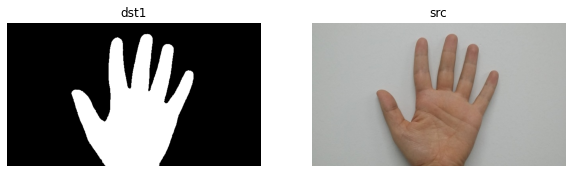

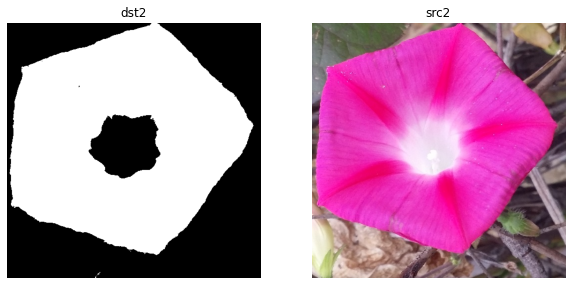

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 1 손
src1 = cv2.imread('c:/data/hand.jpg')
hsv1 = cv2.cvtColor(src1, cv2.COLOR_BGR2HSV)
lowerb1 = (0, 40, 0)
upperb1 = (20, 180, 255)
dst1 = cv2.inRange(hsv1, lowerb1, upperb1)

fig, ax = plt.subplots(1, 2, figsize = (10, 10)) # 2 x 2 서브플롯을 (10, 10)의 크기로 생성
fig.canvas.manager.set_window_title('plt') # 창 이름

ax[0].axis('off')
ax[0].set_title('dst1')
ax[0].imshow(dst1, cmap='gray')


src1 = cv2.cvtColor(src1, cv2.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title('src')
ax[1].imshow(src1)

# 2 꽃
src2 = cv2.imread('c:/data/flower.jpg')
hsv2 = cv2.cvtColor(src2, cv2.COLOR_BGR2HSV)
lowerb2 = (150, 100, 100)
upperb2 = (180, 255, 255)
dst2 = cv2.inRange(hsv2, lowerb2, upperb2)

fig, ax = plt.subplots(1, 2, figsize = (10, 10)) # 2 x 2 서브플롯을 (10, 10)의 크기로 생성
fig.canvas.manager.set_window_title('plt') # 창 이름

ax[0].axis('off')
ax[0].set_title('dst2')
ax[0].imshow(dst2, cmap='gray')


src2 = cv2.cvtColor(src2, cv2.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title('src2')
ax[1].imshow(src2)

### 실시간으로 얼굴 경계 부분 출력

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, (480, 270))
    if not ret:
        break
    
    hsv1 = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lowerb1 = (0, 40, 0)
    upperb1 = (30, 180, 255)
    dst1 = cv2.inRange(hsv1, lowerb1, upperb1)
    cv2.imshow('src', frame)
    cv2.imshow('dst', dst1)
    
    key = cv2.waitKey(25)
    if key == 27:
        break

cv2.destroyAllWindows()

### 7.6 가장 외각의 윤곽선(테두리) 검출
* mode = cv2.RETR_EXTERNAL

In [25]:
import cv2
import numpy as np

src = np.zeros(shape=(512, 512, 3), dtype=np.uint8)
cv2.rectangle(src, (50, 100), (450, 400), (255, 255, 255), -1)
cv2.rectangle(src, (100, 150), (400, 350), (0, 0, 0), -1)
cv2.rectangle(src, (200, 200), (300, 300), (255, 255, 255), -1)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE

# countours(윤곽선) 검출
contours, hierarchy = cv2.findContours(gray, mode, method) # 테두리를 순서대로 찾는 함수
print('type(contour)', type(contours))
print('type(contour[0])', type(contours[0]))
print('len(contour)', len(contours)) # 윤곽선의 개수
print('contour[0].shape', contours[0].shape)
print('contour[0]', contours[0])

# 검출된 윤곽선을 원본에 그림
cv2.drawContours(src, contours, 0, (255, 0, 0), 3) # 모든 윤곽선

# 꼭짓점을 그림
for pt in contours[0][:]:
    cv2.circle(src, (pt[0][0], pt[0][1]), 5, (0, 0, 255), -1)

cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()



type(contour) <class 'tuple'>
type(contour[0]) <class 'numpy.ndarray'>
len(contour) 1
contour[0].shape (4, 1, 2)
contour[0] [[[ 50 100]]

 [[ 50 400]]

 [[450 400]]

 [[450 100]]]


### 7.7 모든 윤곽선(테두리) 검출
* mode = cv2.RETR_LIST

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# src = cv2.imread('c:/data/road2.jpg')
# src = cv2.imread('c:/data/map.PNG')
src = np.zeros(shape=(512, 512, 3), dtype=np.uint8)
cv2.rectangle(src, (50, 100), (450, 400), (255, 255, 255), -1)
cv2.rectangle(src, (100, 150), (400, 350), (0, 0, 0), -1)
cv2.rectangle(src, (200, 200), (300, 300), (255, 255, 255), -1)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 이미지에서 발견된 모든 윤곽선을 계층에 상관하지 말고 나열
mode = cv2.RETR_LIST
method = cv2.CHAIN_APPROX_SIMPLE
# 윤곽선 검출
# contours, hierarchy = cv2.findContours(gray, mode, method)
ret, thr = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thr, mode, method)

print('len(contours) = ', len(contours))
print('len(contours[0]) = ', len(contours[0]))
print('contours', contours)

for cnt in contours:
    # 윤곽선 그림
    cv2.drawContours(src, [cnt], 0, (255, 0, 0), 3)

    # 꼭짓점 그림
    # for pt in cnt:
    #     cv2.circle(src, (pt[0][0], pt[0][1]), 3, (0, 0, 255), -1)

# plt.imshow(src)
# plt.axis('off')
# plt.show()

cv2.imshow('thr', thr)
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()

len(contours) =  2017
len(contours[0]) =  1
contours (array([[[251, 935]]], dtype=int32), array([[[256, 911]],

       [[255, 912]],

       [[256, 912]]], dtype=int32), array([[[266, 907]]], dtype=int32), array([[[255, 904]]], dtype=int32), array([[[258, 900]],

       [[258, 901]],

       [[259, 900]]], dtype=int32), array([[[ 31, 886]],

       [[ 31, 887]]], dtype=int32), array([[[258, 885]],

       [[258, 888]],

       [[259, 888]],

       [[259, 886]]], dtype=int32), array([[[275, 883]],

       [[276, 883]]], dtype=int32), array([[[259, 883]]], dtype=int32), array([[[286, 880]]], dtype=int32), array([[[275, 880]],

       [[276, 880]]], dtype=int32), array([[[285, 878]]], dtype=int32), array([[[280, 878]],

       [[279, 879]],

       [[278, 879]],

       [[279, 880]],

       [[279, 881]],

       [[280, 880]],

       [[281, 881]],

       [[283, 881]],

       [[284, 880]],

       [[283, 880]],

       [[282, 881]],

       [[281, 881]],

       [[280, 880]],

       [

### 7.9 거리 계산

In [1]:
import cv2
import numpy as np

src = np.zeros(shape=(512, 512), dtype=np.uint8)
cv2.rectangle(src, (50, 200), (450, 300), (255, 255, 255), -1)

dist = cv2.distanceTransform(src, distanceType=cv2.DIST_L1, maskSize=3)
minV, maxV, minL, maxL = cv2.minMaxLoc(dist)
print(minV, maxV, minL, maxL)

dst = cv2.normalize(dist, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
ret, dst2 = cv2.threshold(dist, maxV-1, 255, cv2.THRESH_BINARY)

gx = cv2.Sobel(dist, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(dist, cv2.CV_32F, 0, 1, ksize=3)
mag = cv2.magnitude(gx, gy)
minV, maxV, minL, maxL = cv2.minMaxLoc(mag)
ret, dst3 = cv2.threshold(mag, maxV-2, 255, cv2.THRESH_BINARY_INV)

cv2.imshow('src', src)
cv2.imshow('d1', dst)
cv2.imshow('d2', dst2)
cv2.imshow('d3', dst3)
cv2.waitKey()
cv2.destroyAllWindows()

0.0 51.0 (0, 0) (100, 250)


### 7.11 영상분할 distanceTransform(), watershed()

* 이미지에서 물체 영역을 정확히 파악하기 위해서는 물체 영역의 뼈대를 찾아야 합니다. 뼈대를 검출하는 방법 중 하나가 외곽 경계로부터 가장 멀리 떨어진 곳을 찾는 방법인 거리 변환입니다. OpenCV에는 거리 변환을 해주는 cv2.distanceTransform() 함수

* 연속된 영역의 색을 채우는 함수 watershed()

In [2]:
import cv2
import numpy as np

src = cv2.imread('c:/data/circles2.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, bImage = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
dist = cv2.distanceTransform(bImage, cv2.DIST_L1, 3)
dist8 = cv2.normalize(dist, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2.imshow('bImage', bImage)
cv2.imshow('dist8', dist8)

minV, maxV, minL, maxL = cv2.minMaxLoc(dist)
print(minV, maxV, minL, maxL)
mask = (dist > maxV * 0.5).astype(np.uint8) * 255
cv2.imshow('mask', mask)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(mask, mode, method)
print('len(contours) = ', len(contours))

markers = np.zeros(shape=src.shape[:2], dtype=np.int32)
for i, cnt in enumerate(contours):
    cv2.drawContours(markers, [cnt], 0, i+1, -1)

dst = src.copy()
cv2.watershed(src, markers)

dst[markers == -1] = [0, 0, 255]
for i in range(len(contours)):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[markers == i+1] = [b, g, r]
dst = cv2.addWeighted(src, 0.4, dst, 0.6, 0) # 합성

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

0.0 76.0 (0, 0) (220, 220)
len(contours) =  6


### 7.14 컬러 클러스터링 영역 검출, cv2.kmeans()

##### OpenCV에서 K-Means 알고리즘을 이용한 데이터 군집화는 cv2.kmeans() 함수를 통해 이용 됩니다. 이 함수에 대한 인자는 다음과 같습니다.
* samples : np.float32 데이타 타입이며, 각 피쳐(Feature)는 단일 열(Column)으로 저장되어져 있어야 합니다.
* nclusters(K) : 군집화할 개수
* criteria : 반복을 종료할 조건입니다. 조건이 만족되면 알고리즘의 반복은 중지됩니다. 3개의 인자를 갖는 튜플(Tuple)이며, (type, max_iter, epsilon)입니다. 각각의 대한 인자는 다음과 같습니다.
* type : 종료 조건의 타입으로 cv2.TERM_CRITERIA_EPS는 주어진 정확도(epsilon 인자)에 도달하면 반복을 중단하고, cv2.TERM_CRITERIA_MAX_ITER는 max_iter 인자에 지정된 횟수만큼 반복하고 중단합니다. cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER를 조합해 사용하면 두가지 조건 중 하나가 만족되면 반복이 중단됩니다.
* max_iter : 최대 반복할 횟수(정수형 타입)
* epsilon : 정확도
* attempts : 다른 초기 라벨링을 사용하면서 실행되는 알고리즘의 실행 횟수를 지정하는 플래그. 알고리즘은 최적의 컴팩트함(Compactness)을 만드는 라벨을 반환합니다. 이 컴팩트함은 출력으로 반환됩니다.
* flags : 초기값을 잡을 중심에 대한 플래그로써 cv2.KMEANS_PP_CENTERS와 cv2.KMEANS_RANDOM_CENTERS 중 하나가 사용됩니다.

##### 이 함수의 반환값은 다음과 같습니다.
* compactness : 각 포인트와 군집화를 위한 중심 간의 거리의 제곱의 합
* labes : 라벨에 대한 배열이며, ‘0’, ‘1’ 같이 이전 글에서 언급한 내용과 같음.
* centers : 클러스터의 중심이 저장된 배열

In [7]:
import cv2
import numpy as np

src = cv2.imread('c:/data/hand.jpg')
# src = cv2.imread('c:/data/flower.jpg')
# hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

data = src.reshape((-1, 3)).astype(np.float32)
# data = hsv.reshape((-1, 3)).astype(np.float32)

K = 2 # 나눌 개수
term_crit = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, labels, centers = cv2.kmeans(data, K, None, term_crit, 5, cv2.KMEANS_RANDOM_CENTERS)
print('centers.shape', centers.shape)
print('labels.shape', labels.shape)
print('ret', ret)

centers = np.uint8(centers)
res = centers[labels.flatten()]
dst = res.reshape(src.shape)
# dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

centers.shape (2, 3)
labels.shape (230400, 1)
ret 62989280.689894974


### 실시간 kmeans 클러스터링

In [25]:
import cv2
import numpy as np

src = cv2.VideoCapture(0)

while True:
    ret, frame = src.read()
    
    if not ret: break
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    data = frame.reshape((-1, 3)).astype(np.float32)

    K = 5 # 나눌 개수
    term_crit = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 5, 1.0)
    ret, labels, centers = cv2.kmeans(data, K, None, term_crit, 5, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    dst = res.reshape(frame.shape)

    cv2.imshow('dst', dst)
    key = cv2.waitKey(25)
    if key == 27:
        break
cv2.destroyAllWindows()

### 7.15 레이블링, 물체 구분

In [9]:
import cv2
import numpy as np

#1
src = cv2.imread('c:/data/circles.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, res = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

#2
# 픽셀이 0 이면 배경, 0이 아니면 물체
ret, labels = cv2.connectedComponents(res)
print('ret= ', ret)

vMin, vMax, lMin, lMax = cv2.minMaxLoc(labels)
print(vMin, vMax, lMin, lMax)

# 0은 배경 3은 물체
print(labels[335:345, 330:340])

#3
dst = np.zeros(src.shape, dtype=src.dtype)
for i in range(1, ret):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[labels==i] = [b, g, r]

cv2.imshow('res', res)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

ret=  4
0.0 3.0 (0, 0) (339, 338)
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3]
 [0 0 0 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]]
